In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import numpy as np
import time
from citipy import citipy

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [94]:

# Dependencies# Depend 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import numpy as np
import time
from citipy import citipy
import json
# API Key

import api_keys

# Generating random latitudes and longitudes
lat = np.random.uniform(low=-90, high=90, size=2000)
lng = np.random.uniform(low=-180, high=180, size=2000)

# Creating coordinate pairs
coordinates = []
for x in range(0,len(lat)):
    coordinates.append((lat[x], lng[x]))
    # Finding the cities nearest to the coordinates
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

# Creating DataFrame
cities_df = pd.DataFrame(cities)
cities_df["City Name"] = ""
cities_df["Country Code"] = ""

for index, row in cities_df.iterrows():
    row["City Name"] = cities_df.iloc[index,0].city_name
    row["Country Code"] = cities_df.iloc[index,0].country_code

#Dropping duplicate cities
cities_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
cities_df.reset_index(inplace=True)

 #Deleting unnecessary columns
del cities_df[0]
del cities_df['index']

cities_df.head()

,City Name,Country Code
0,brae,gb
1,bayir,jo
2,hermanus,za
3,chagda,ru
4,atuona,pf


In [96]:
# Adding columns for values# Adding 
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,brae,gb,,,,,,
1,bayir,jo,,,,,,
2,hermanus,za,,,,,,
3,chagda,ru,,,,,,
4,atuona,pf,,,,,,


## Perform API Calls

In [99]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



In [100]:
# Accessing data
print("Beginning Data Retrieval")
print("---------------------------------")

# Limiting pull requests
start_time = time.time()

for index, row in cities_df.iterrows():
    # Building target url
    url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], row['Country Code'], api_key)
   
    # Printing to ensure loop is correct
    print("Now retrieving City #" + str(index) + ": " + row['City Name'] + ", " + row['Country Code'])
    print(url)
    
    # Running request
    weather_data = req.get(url).json()
    
    try:
        # Appending latitude and longitude to correct location
        row['Latitude'] = weather_data['coord']['lat']
        row['Longitude'] = weather_data['coord']['lon']
    
        # Appending temperature to correct location
        row['Temperature (F)'] = weather_data['main']['temp']
    
        # Appending humidity to correct location
        row['Humidity (%)'] = weather_data['main']['humidity']
    
        # Appending cloudiness to correct location
        row['Cloudiness (%)'] = weather_data['clouds']['all']
    
        # Appending wind speed to correct location
        row['Wind Speed (mph)'] = weather_data['wind']['speed']
    except:
        print("Error with city data. Skipping")
        continue
        
    # Pausing to limit pull requests
    if (index + 1) % 60 == 0:
        run_time = time.time() - start_time
        time.sleep(60 - run_time)
        start_time = time.time()
    
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    
# Dropping NaN values
cities_df.dropna(inplace=True)

cities_df.head()

Beginning Data Retrieval
---------------------------------
Now retrieving City #0: brae, gb
http://api.openweathermap.org/data/2.5/weather?q=brae,gb&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #1: bayir, jo
http://api.openweathermap.org/data/2.5/weather?q=bayir,jo&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error with city data. Skipping
Now retrieving City #2: hermanus, za
http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #3: chagda, ru
http://api.openweathermap.org/data/2.5/weather?q=chagda,ru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error with city data. Skipping
Now retrieving City #4: atuona, pf
http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #5: klaksvik, fo
http://api.openweathermap.org/data/2.5/weather?q=klaksvik,fo&units=imperial&appid=25bc90a1196e6f153eece0

Now retrieving City #51: tsogni, ga
http://api.openweathermap.org/data/2.5/weather?q=tsogni,ga&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #52: wa, gh
http://api.openweathermap.org/data/2.5/weather?q=wa,gh&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #53: hami, cn
http://api.openweathermap.org/data/2.5/weather?q=hami,cn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #54: saskylakh, ru
http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #55: sitka, us
http://api.openweathermap.org/data/2.5/weather?q=sitka,us&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #56: busselton, au
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #57: gogrial, sd
http://api.openweathermap.org/data/2.5/weather?q=gogrial,sd&units=imper

Now retrieving City #103: vaini, to
http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #104: souillac, mu
http://api.openweathermap.org/data/2.5/weather?q=souillac,mu&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #105: luderitz, na
http://api.openweathermap.org/data/2.5/weather?q=luderitz,na&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #106: longyearbyen, sj
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen,sj&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #107: bathsheba, bb
http://api.openweathermap.org/data/2.5/weather?q=bathsheba,bb&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #108: kruisfontein, za
http://api.openweathermap.org/data/2.5/weather?q=kruisfontein,za&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #109: butaritari, ki
http://api.openweatherm

Now retrieving City #155: barentsburg, sj
http://api.openweathermap.org/data/2.5/weather?q=barentsburg,sj&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error with city data. Skipping
Now retrieving City #156: vardo, no
http://api.openweathermap.org/data/2.5/weather?q=vardo,no&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #157: chuy, uy
http://api.openweathermap.org/data/2.5/weather?q=chuy,uy&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #158: nanma, cn
http://api.openweathermap.org/data/2.5/weather?q=nanma,cn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #159: tamale, gh
http://api.openweathermap.org/data/2.5/weather?q=tamale,gh&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #160: seoul, kr
http://api.openweathermap.org/data/2.5/weather?q=seoul,kr&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #161: mogadishu, so
http://api.openweathermap.org

Now retrieving City #206: harstad, no
http://api.openweathermap.org/data/2.5/weather?q=harstad,no&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #207: zory, pl
http://api.openweathermap.org/data/2.5/weather?q=zory,pl&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #208: kenitra, ma
http://api.openweathermap.org/data/2.5/weather?q=kenitra,ma&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #209: albion, mu
http://api.openweathermap.org/data/2.5/weather?q=albion,mu&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #210: bethel, us
http://api.openweathermap.org/data/2.5/weather?q=bethel,us&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #211: kamenskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=kamenskoye,ru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error with city data. Skipping
Now retrieving City #212: abha, sa
http://api.openweathermap.

Now retrieving City #258: alice springs, au
http://api.openweathermap.org/data/2.5/weather?q=alice springs,au&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #259: jiaozuo, cn
http://api.openweathermap.org/data/2.5/weather?q=jiaozuo,cn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #260: sechura, pe
http://api.openweathermap.org/data/2.5/weather?q=sechura,pe&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #261: roebourne, au
http://api.openweathermap.org/data/2.5/weather?q=roebourne,au&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #262: tocopilla, cl
http://api.openweathermap.org/data/2.5/weather?q=tocopilla,cl&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #263: aklavik, ca
http://api.openweathermap.org/data/2.5/weather?q=aklavik,ca&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #264: honiara, sb
http://api.openweathermap.org/

Error with city data. Skipping
Now retrieving City #310: san policarpo, ph
http://api.openweathermap.org/data/2.5/weather?q=san policarpo,ph&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #311: faya, td
http://api.openweathermap.org/data/2.5/weather?q=faya,td&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error with city data. Skipping
Now retrieving City #312: batticaloa, lk
http://api.openweathermap.org/data/2.5/weather?q=batticaloa,lk&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #313: saint-georges, gf
http://api.openweathermap.org/data/2.5/weather?q=saint-georges,gf&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error with city data. Skipping
Now retrieving City #314: yulara, au
http://api.openweathermap.org/data/2.5/weather?q=yulara,au&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #315: pontes e lacerda, br
http://api.openweathermap.org/data/2.5/weather?q=pontes e lacerda,br&units=imp

Now retrieving City #362: ahuimanu, us
http://api.openweathermap.org/data/2.5/weather?q=ahuimanu,us&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #363: lavrentiya, ru
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya,ru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #364: bilma, ne
http://api.openweathermap.org/data/2.5/weather?q=bilma,ne&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #365: caravelas, br
http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #366: kondinskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=kondinskoye,ru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #367: gushikawa, jp
http://api.openweathermap.org/data/2.5/weather?q=gushikawa,jp&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #368: sisimiut, gl
http://api.openweathermap.org

Now retrieving City #415: nata, bw
http://api.openweathermap.org/data/2.5/weather?q=nata,bw&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #416: sept-iles, ca
http://api.openweathermap.org/data/2.5/weather?q=sept-iles,ca&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #417: lethem, gy
http://api.openweathermap.org/data/2.5/weather?q=lethem,gy&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #418: atar, mr
http://api.openweathermap.org/data/2.5/weather?q=atar,mr&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #419: palmer, us
http://api.openweathermap.org/data/2.5/weather?q=palmer,us&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #420: mullaitivu, lk
http://api.openweathermap.org/data/2.5/weather?q=mullaitivu,lk&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error with city data. Skipping
Now retrieving City #421: la ronge, ca
http://api.openweatherma

Now retrieving City #468: senanga, zm
http://api.openweathermap.org/data/2.5/weather?q=senanga,zm&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #469: arriaga, mx
http://api.openweathermap.org/data/2.5/weather?q=arriaga,mx&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #470: vila franca do campo, pt
http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo,pt&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #471: aksu, cn
http://api.openweathermap.org/data/2.5/weather?q=aksu,cn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #472: tiznit, ma
http://api.openweathermap.org/data/2.5/weather?q=tiznit,ma&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #473: sardulgarh, in
http://api.openweathermap.org/data/2.5/weather?q=sardulgarh,in&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #474: yanan, cn
http://api.openweathermap.or

Now retrieving City #521: noyabrsk, ru
http://api.openweathermap.org/data/2.5/weather?q=noyabrsk,ru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #522: port lincoln, au
http://api.openweathermap.org/data/2.5/weather?q=port lincoln,au&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #523: vanderhoof, ca
http://api.openweathermap.org/data/2.5/weather?q=vanderhoof,ca&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #524: alexandria, us
http://api.openweathermap.org/data/2.5/weather?q=alexandria,us&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #525: maceio, br
http://api.openweathermap.org/data/2.5/weather?q=maceio,br&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #526: sobolevo, ru
http://api.openweathermap.org/data/2.5/weather?q=sobolevo,ru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #527: kikwit, cd
http://api.openweathermap.o

Now retrieving City #573: flinders, au
http://api.openweathermap.org/data/2.5/weather?q=flinders,au&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #574: junin, pe
http://api.openweathermap.org/data/2.5/weather?q=junin,pe&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #575: alta floresta, br
http://api.openweathermap.org/data/2.5/weather?q=alta floresta,br&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #576: umm lajj, sa
http://api.openweathermap.org/data/2.5/weather?q=umm lajj,sa&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #577: san ignacio, bo
http://api.openweathermap.org/data/2.5/weather?q=san ignacio,bo&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error with city data. Skipping
Now retrieving City #578: iquitos, pe
http://api.openweathermap.org/data/2.5/weather?q=iquitos,pe&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #579: hammerfest,

Now retrieving City #627: filadelfia, py
http://api.openweathermap.org/data/2.5/weather?q=filadelfia,py&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #628: mayo, ca
http://api.openweathermap.org/data/2.5/weather?q=mayo,ca&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #629: alyangula, au
http://api.openweathermap.org/data/2.5/weather?q=alyangula,au&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #630: loukhi, ru
http://api.openweathermap.org/data/2.5/weather?q=loukhi,ru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #631: molteno, za
http://api.openweathermap.org/data/2.5/weather?q=molteno,za&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #632: ilmajoki, fi
http://api.openweathermap.org/data/2.5/weather?q=ilmajoki,fi&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #633: worthing, gb
http://api.openweathermap.org/data/2.5/weathe

Now retrieving City #680: norsup, vu
http://api.openweathermap.org/data/2.5/weather?q=norsup,vu&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #681: petropavlovsk-kamchatskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=petropavlovsk-kamchatskiy,ru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #682: lubumbashi, cd
http://api.openweathermap.org/data/2.5/weather?q=lubumbashi,cd&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #683: doka, sd
http://api.openweathermap.org/data/2.5/weather?q=doka,sd&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #684: wonthaggi, au
http://api.openweathermap.org/data/2.5/weather?q=wonthaggi,au&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #685: mchinji, mw
http://api.openweathermap.org/data/2.5/weather?q=mchinji,mw&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #686: santa eulalia del rio, e

Now retrieving City #732: fonte boa, br
http://api.openweathermap.org/data/2.5/weather?q=fonte boa,br&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #733: aquidauana, br
http://api.openweathermap.org/data/2.5/weather?q=aquidauana,br&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #734: maple creek, ca
http://api.openweathermap.org/data/2.5/weather?q=maple creek,ca&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #735: virginia beach, us
http://api.openweathermap.org/data/2.5/weather?q=virginia beach,us&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #736: payo, ph
http://api.openweathermap.org/data/2.5/weather?q=payo,ph&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error with city data. Skipping
Now retrieving City #737: rio gallegos, ar
http://api.openweathermap.org/data/2.5/weather?q=rio gallegos,ar&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Now retrieving City #

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,brae,gb,60.40,-1.35,50.77,76.0,64.0,13.87
2,hermanus,za,-34.42,19.24,45.84,93.0,68.0,3.58
4,atuona,pf,-9.80,-139.03,80.31,100.0,92.0,19.69
5,klaksvik,fo,62.23,-6.59,50.00,93.0,44.0,17.22
6,port alfred,za,-33.59,26.89,56.82,100.0,0.0,3.24


In [113]:
cities_df = cities_df.head(500).reset_index()
writer = pd.ExcelWriter('output.xlsx')
cities_df.to_excel(writer,'sheet1')
writer.save()


In [115]:
cities_df.to_csv('C:\\Users\\thiag\\Desktop\\UDEN201805DATA1-master(10)\\Week6\\Instructions\\starter_code\\output_city_weather.csv')
    

In [116]:
pwd

'C:\\Users\\thiag\\Desktop\\UDEN201805DATA1-master(10)\\Week6\\Instructions\\starter_code'

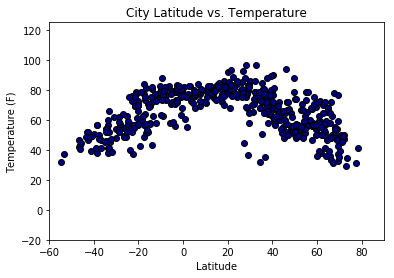

In [122]:
#Latitude vs. Temperature Plot

# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Temperature (F)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black')

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Temperature (F)")
plt.ylim(-20,125)

plt.savefig("C:\\Users\\thiag\\Desktop\\UDEN201805DATA1-master(10)\\Week6\\Instructions\\starter_code\\LatitudeVsTemperature.png")
plt.show()

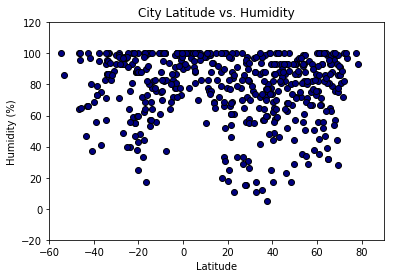

In [123]:
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Humidity (%)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Humidity (%)")
plt.ylim(-20,120)

plt.savefig("C:\\Users\\thiag\\Desktop\\UDEN201805DATA1-master(10)\\Week6\\Instructions\\starter_code\\LatitudeVsHumidity.png")
plt.show()

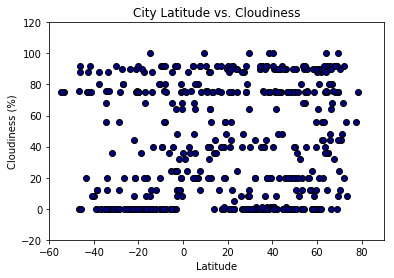

In [125]:
#Latitude vs. Cloudiness Plot

# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Cloudiness (%)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Cloudiness (%)")
plt.ylim(-20,120)



plt.savefig("C:\\Users\\thiag\\Desktop\\UDEN201805DATA1-master(10)\\Week6\\Instructions\\starter_code\\LatitudeVsCloudiness.png")
plt.show()

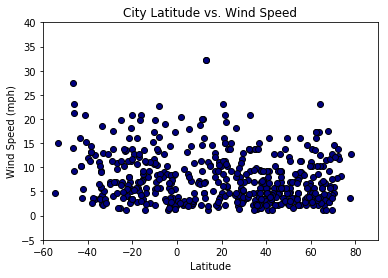

In [126]:
#Latitude vs. Wind Speed Plot

# Axes values# Axes v 
x_axis = cities_df['Latitude']
y_axis = cities_df['Wind Speed (mph)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,40)

plt.savefig("C:\\Users\\thiag\\Desktop\\UDEN201805DATA1-master(10)\\Week6\\Instructions\\starter_code\\LatitudeVsWindSpeed.png")
plt.show()